<a href="https://colab.research.google.com/github/JeetVyas25/DeepFashion_model/blob/main/DeepFashion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing Dataset of 1000 images on local system

In [ ]:
import os
import json
import random
import shutil

def preparing_data(image_dir, annotation_file, output_dir, annotations_dir, num_images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    with open(annotation_file, 'r') as f:
        data = json.load(f)

    image_filenames = os.listdir(image_dir)
    selected_images = random.sample(image_filenames, num_images)

    new_data = {
        "info": data.get("info"),
        "categories": data.get("categories"),
        "annotations": [],
        "images": []
    }

    for image_name in selected_images:
        image_id = os.path.splitext(image_name)[0]

        image_data = next((image for image in data["images"] if image["id"] == image_id), None)
        if image_data:
            new_data["images"].append(image_data)

        annotations_for_image = [annotation for annotation in data["annotations"] if annotation["image_id"] == image_id]
        for annotation_data in annotations_for_image:
            new_data["annotations"].append(annotation_data)

    with open(os.path.join(annotations_dir, 'train_data.json'), 'w') as f:
        json.dump(new_data, f, indent=4)

    for image_name in selected_images:
        shutil.copy(os.path.join(image_dir, image_name), output_dir)

    print("Length of images:", len(new_data["images"]))
    print("Length of annotations:", len(new_data["annotations"]))


if __name__ == "__main__":
    image_dir = "E:\\New_fashion_dataset\\deep_fashion\\images\\val"
    annotation_file ="E:\\New_fashion_dataset\\deep_fashion\\annotations\\instances_val2024.json"
    output_dir = "C:\\Users\\Jeet Vyas\\Untitled Folder 1\\images\\val"
    annotations_dir = "C:\\Users\\Jeet Vyas\\Untitled Folder 1\\annotations"
    num_images = 1000

    preparing_data(image_dir, annotation_file, output_dir, annotations_dir, num_images)


Converted MSCOCO to YOLO

In [ ]:
import json
import os
import shutil

def convert_to_yolo(input_images_path, input_json_path, output_images_path, output_labels_path):
    """
    Function to convert images to YOLO format.

    Args:
        input_images_path (str): Path to the input images directory.
        input_json_path (str): Path to the input JSON file.
        output_images_path (str): Path to the output images directory.
        output_labels_path (str): Path to the output labels directory.
    """
    with open(input_json_path) as f:
        data = json.load(f)

    os.makedirs(output_images_path, exist_ok=True)
    os.makedirs(output_labels_path, exist_ok=True)

    file_names = []
    for filename in os.listdir(input_images_path):
        if filename.endswith(".jpg"):
            source = os.path.join(input_images_path, filename)
            destination = os.path.join(output_images_path, filename)
            shutil.copy(source, destination)
            file_names.append(filename)

    def get_img_ann(image_id):
        return [ann for ann in data['annotations'] if ann['image_id'] == image_id]

    def get_img(filename):
        return next((img for img in data['images'] if img['file_name'] == filename), None)

    for filename in file_names:
        img = get_img(filename)
        img_id = img['id']
        img_w = img['width']
        img_h = img['height']
        img_ann = get_img_ann(img_id)

        if img_ann:
            with open(os.path.join(output_labels_path, f"{os.path.splitext(filename)[0]}.txt"), "a") as file_object:
                for ann in img_ann:
                    current_category = ann['category_id'] - 1
                    polygon = ann['segmentation'][0]
                    normalized_polygon = [format(coord / img_w if i % 2 == 0 else coord / img_h, '.6f') for i, coord in enumerate(polygon)]
                    file_object.write(f"{current_category} " + " ".join(normalized_polygon) + "\n")

if __name__ == "__main__":
    base_input_path = "EM-platelet-multi/input/"
    base_output_path = "EM-platelet-multi/yolo_dataset/"

    convert_to_yolo(
        input_images_path=os.path.join(base_input_path, "D:\\dataset\\dataset\\images_input"),
        input_json_path=os.path.join(base_input_path, "D:\\dataset\\dataset\\annotations\\train_data.json"),
        output_images_path=os.path.join(base_output_path, "D:\\dataset\\dataset\\images_output"),
        output_labels_path=os.path.join(base_output_path, "D:\\dataset\\dataset\\labels")
    )


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

Importing dataset

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="DFgOwZ8kbfFYFwgiMap8")
project = rf.workspace("insynk-vdlo1").project("insynk-itsmv")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Insynk-1 in yolov8:: 100%|██████████| 2011/2011 [00:00<00:00, 7171.40it/s]


Training model

In [5]:
import os
import yaml
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image

def train_model_with_config(config_file, data, project, name):
    """
    Train a YOLO model with specified configuration.

    Args:
        config_file (str): Path to the YAML configuration file.
        data (str): Path to the YAML data file.
        project (str): Path to the project directory for results.
        name (str): Name of the training.

    Returns:
        dict: Results of the training.
    """
    model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

    with open(config_file, 'r') as f:
        config = yaml.safe_load(f)

    epochs = config['epochs']
    patience = config['patience']
    imgsz = config['imgsz']
    batch = config['batch']
    conf = config['conf']
    iou = config['iou']

    results = model.train(data=data,
                          	   project=project,
                          	   name=name,
                         	   epochs=epochs,
                         	   patience=patience,
                        	   imgsz=imgsz,
                        	   batch=batch,
                        	   conf=conf,
                        	   iou=iou)

    return results

# Load number of classes from data.yaml
with open("/content/Insynk-1/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

# Define project and name for training
project = "/content/Insynk-1/Results"
name = "20_epochs-"

# Train the model
results = train_model_with_config('/content/Insynk-1/config.yaml',
                                  data='/content/Insynk-1/data.yaml',
                                  project=project,
                                  name=name)


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Insynk-1/data.yaml, epochs=20, time=None, patience=0, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/Insynk-1/Results, name=20_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.6, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 98.9MB/s]


AMP: checks passed ✅


train: Scanning /content/Insynk-1/train/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 1747.36it/s]

train: New cache created: /content/Insynk-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Insynk-1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 726.83it/s]

val: New cache created: /content/Insynk-1/valid/labels.cache


Plotting labels to /content/Insynk-1/Results/20_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/Insynk-1/Results/20_epochs-2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20       1.7G      1.107      3.262      3.735      1.461         31        640: 100%|██████████| 100/100 [00:27<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]

                   all        100        166      0.125    0.00977     0.0679     0.0566      0.125    0.00977     0.0679     0.0424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.59G      1.095      2.662      2.996      1.413         28        640: 100%|██████████| 100/100 [00:24<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]

                   all        100        166      0.183      0.139       0.15      0.106      0.192      0.147      0.157      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.69G      1.086      2.573      2.788      1.402         33        640: 100%|██████████| 100/100 [00:24<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.21it/s]

                   all        100        166      0.227      0.179      0.182      0.128      0.223      0.177      0.179      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.58G      1.079      2.668      2.669      1.399         31        640: 100%|██████████| 100/100 [00:22<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]

                   all        100        166      0.213      0.262      0.219      0.167      0.214      0.263       0.22      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.69G      1.044      2.498      2.585      1.365         30        640: 100%|██████████| 100/100 [00:22<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]


                   all        100        166      0.319      0.247      0.274      0.192      0.319      0.247      0.274      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20       1.6G      1.027      2.418      2.444      1.328         37        640: 100%|██████████| 100/100 [00:28<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]

                   all        100        166      0.207      0.248      0.203      0.146      0.207      0.248      0.203      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.69G     0.9863      2.363      2.393      1.298         21        640: 100%|██████████| 100/100 [00:22<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.28it/s]

                   all        100        166      0.362      0.217      0.286      0.218      0.359      0.215      0.283      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20       1.6G     0.9739      2.348      2.307      1.294         46        640: 100%|██████████| 100/100 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all        100        166      0.304      0.291      0.288      0.226      0.301      0.288      0.286      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.64G     0.9777      2.281      2.251      1.307         35        640: 100%|██████████| 100/100 [00:22<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.05it/s]

                   all        100        166      0.276      0.256      0.262      0.204      0.276      0.256      0.262      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20       1.6G     0.9556      2.308      2.186      1.284         35        640: 100%|██████████| 100/100 [00:23<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]

                   all        100        166      0.313      0.268      0.292      0.231      0.311      0.266       0.29      0.219


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.68G     0.9416      2.267      2.365      1.367         12        640: 100%|██████████| 100/100 [00:24<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]

                   all        100        166      0.321      0.314      0.316      0.257      0.319      0.312      0.312      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.54G     0.9146      2.132      2.144      1.347         12        640: 100%|██████████| 100/100 [00:26<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]

                   all        100        166      0.316      0.397       0.34      0.269      0.313      0.395      0.338      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.68G     0.8972      2.059      2.079      1.322         13        640: 100%|██████████| 100/100 [00:33<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        100        166      0.356      0.496       0.43      0.353      0.353      0.491      0.426       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.68G     0.8591      2.043       1.99        1.3         12        640: 100%|██████████| 100/100 [00:21<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]

                   all        100        166      0.453      0.334      0.363      0.287      0.444      0.332       0.36      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.68G     0.8409      1.973       1.91      1.277         12        640: 100%|██████████| 100/100 [00:21<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        100        166      0.431      0.501      0.485        0.4      0.429      0.499      0.482      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.67G      0.804      1.924      1.828      1.249         16        640: 100%|██████████| 100/100 [00:20<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]

                   all        100        166      0.542      0.545      0.533      0.439      0.518      0.529      0.519        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.54G     0.7663      1.865      1.762      1.222         13        640: 100%|██████████| 100/100 [00:21<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]


                   all        100        166      0.491      0.476      0.486      0.407      0.491      0.476      0.485      0.377

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.54G     0.7535      1.806       1.73        1.2         12        640: 100%|██████████| 100/100 [00:22<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.86it/s]

                   all        100        166      0.562      0.365       0.39      0.321      0.557      0.361      0.385      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.54G     0.7449      1.806      1.653      1.196         13        640: 100%|██████████| 100/100 [00:22<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        100        166      0.545      0.401      0.405      0.339      0.543      0.399      0.405      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.68G     0.7202      1.765      1.644      1.176         13        640: 100%|██████████| 100/100 [00:21<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all        100        166      0.346      0.435      0.399      0.333      0.344      0.432      0.397      0.311



20 epochs completed in 0.144 hours.
Optimizer stripped from /content/Insynk-1/Results/20_epochs-2/weights/last.pt, 6.8MB
Optimizer stripped from /content/Insynk-1/Results/20_epochs-2/weights/best.pt, 6.8MB

Validating /content/Insynk-1/Results/20_epochs-2/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3260404 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


                   all        100        166       0.54      0.539      0.531      0.437      0.516      0.523      0.517      0.398
     long sleeve dress        100          1          1          1      0.995      0.995          1          1      0.995      0.796
   long sleeve outwear        100          6          1      0.167      0.583       0.35          1      0.167      0.583      0.467
       long sleeve top        100         19      0.577      0.789       0.61      0.448      0.577      0.789       0.61      0.422
    short sleeve dress        100         11      0.421      0.727      0.594      0.467      0.421      0.727      0.594      0.469
      short sleeve top        100         38      0.706      0.632      0.676       0.59      0.676      0.605      0.659      0.524
                shorts        100         17      0.818      0.529      0.712       0.55      0.818      0.529      0.712      0.514
                 skirt        100         14      0.375      0.643   

Validating Model

In [6]:
import yaml
from ultralytics import YOLO

# Load a model
model = YOLO('/content/Insynk-1/Results/20_epochs-2/weights/best.pt')

# Customize validation settings
config_file = '/content/Insynk-1/config.yaml'  # Update with the correct path to your config file

with open(config_file, 'r') as f:
    config = yaml.safe_load(f)

epochs = config['epochs']
imgsz = config['imgsz']
batch = config['batch']
conf = config['conf']
iou = config['iou']

validation_results = model.val(data='/content/Insynk-1/data.yaml',
                              epochs=epochs,
                              imgsz=imgsz,
                              batch=batch,
                              conf=conf,
                              iou=iou)


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3260404 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/Insynk-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]


                   all        100        166      0.542      0.545      0.533      0.439      0.518      0.529      0.519        0.4
     long sleeve dress        100          1          1          1      0.995      0.995          1          1      0.995      0.796
   long sleeve outwear        100          6          1      0.167      0.583       0.35          1      0.167      0.583      0.467
       long sleeve top        100         19      0.577      0.789       0.61      0.452      0.577      0.789       0.61      0.422
    short sleeve dress        100         11      0.421      0.727      0.594      0.467      0.421      0.727      0.594      0.469
      short sleeve top        100         38      0.706      0.632      0.675      0.589      0.676      0.605      0.658      0.524
                shorts        100         17      0.818      0.529      0.712       0.55      0.818      0.529      0.712      0.514
                 skirt        100         14        0.4      0.714   

Predicting on test directory

In [7]:
from ultralytics import YOLO  # Importing YOLO from ultralytics module

# Loading the YOLO model
model = YOLO('/content/Insynk-1/Results/20_epochs-2/weights/best.pt')

# Predicting on images and saving the results
model.predict('/content/Insynk-1/test/images', save=True, imgsz=640, conf=0.25)



image 1/100 /content/Insynk-1/test/images/000731_jpg.rf.9693aadb968941d0503ce4203a9b7a7d.jpg: 640x640 1 vest, 22.4ms
image 2/100 /content/Insynk-1/test/images/000774_jpg.rf.c606caef54fde8c439a98bf78d5027d5.jpg: 640x640 1 skirt, 18.1ms
image 3/100 /content/Insynk-1/test/images/006250_jpg.rf.cdf7619d984836658c9b8f1a86f050bf.jpg: 640x640 1 short sleeve dress, 17.6ms
image 4/100 /content/Insynk-1/test/images/007318_jpg.rf.ccc831001485afd4ce5f46087677c5e4.jpg: 640x640 (no detections), 17.7ms
image 5/100 /content/Insynk-1/test/images/009980_jpg.rf.d7cbcf4ae3a41b3300a6e646e6e3dec1.jpg: 640x640 1 trousers, 1 vest dress, 17.7ms
image 6/100 /content/Insynk-1/test/images/010969_jpg.rf.d7ef7f196f915c8b47de0cf1433e2e9b.jpg: 640x640 (no detections), 18.5ms
image 7/100 /content/Insynk-1/test/images/012967_jpg.rf.cd05257fa53a8b5ce100eb941e0ce454.jpg: 640x640 1 long sleeve top, 1 trousers, 18.7ms
image 8/100 /content/Insynk-1/test/images/013280_jpg.rf.fad2e0a75bb9adbc98fe26e0f266ada7.jpg: 640x640 1 lo

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'long sleeve dress', 1: 'long sleeve outwear', 2: 'long sleeve top', 3: 'short sleeve dress', 4: 'short sleeve top', 5: 'shorts', 6: 'skirt', 7: 'sling', 8: 'sling dress', 9: 'trousers', 10: 'vest', 11: 'vest dress'}
 obb: None
 orig_img: array([[[ 10,  17,  36],
         [ 10,  17,  36],
         [ 11,  18,  38],
         ...,
         [205, 220, 223],
         [205, 220, 223],
         [205, 220, 223]],
 
        [[  8,  15,  34],
         [  8,  15,  34],
         [  8,  15,  35],
         ...,
         [205, 220, 223],
         [205, 220, 223],
         [205, 220, 223]],
 
        [[  6,  13,  32],
         [  6,  13,  32],
         [  6,  13,  33],
         ...,
         [205, 220, 223],
         [205, 220, 223],
         [205, 220, 223]],
 
        ...,
 
        [[ 95, 126, 177],
         [ 95, 

Optimizing to ONNX

In [9]:
import yaml
from ultralytics import YOLO

# Load a model
model = YOLO('/content/Insynk-1/Results/20_epochs-2/weights/best.pt')  # load a custom trained model

# Load config from YAML file
with open('/content/Insynk-1/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Export the model
model.export(format='onnx')


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3260404 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from '/content/Insynk-1/Results/20_epochs-2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 48, 8400), (1, 32, 160, 160)) (6.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 10.5s, saved as '/content/Insynk-1/Results/20_epochs-2/weights/best.onnx' (12.7 MB)

Export complete (12.4s)
Results saved to /content/Insynk-1/Results/20_epochs-2/weights
Predict:         yolo predict task=segment model=/content/Insynk-1/Res

'/content/Insynk-1/Results/20_epochs-2/weights/best.onnx'

Visualising the results


image 1/1 /content/Insynk-1/test/images/097271_jpg.rf.24f4fa2ade36f51952c20839f023d650.jpg: 640x640 1 vest dress, 22.1ms
Speed: 1.8ms preprocess, 22.1ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 640)


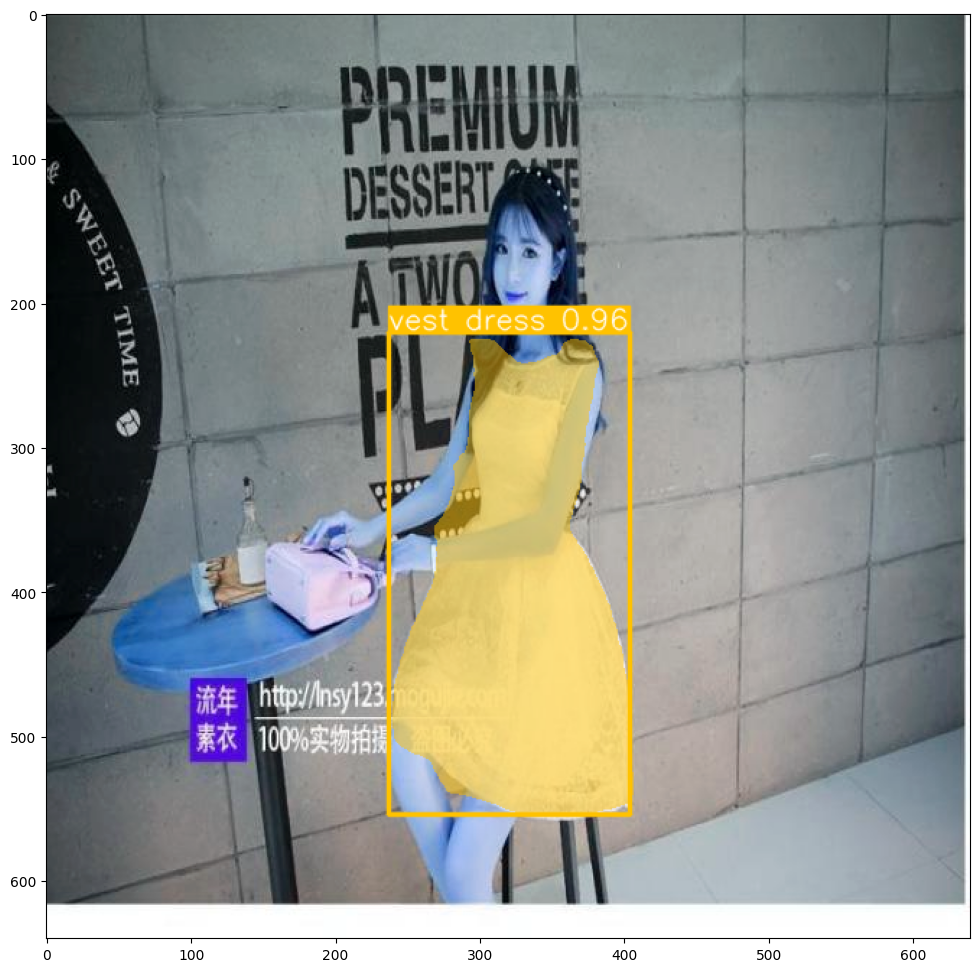

In [14]:
import matplotlib.pyplot as plt

# Load YOLO model
fashion_model = YOLO('/content/Insynk-1/Results/20_epochs-2/weights/best.pt')

# Define the path to the new image
new_image = '/content/Insynk-1/test/images/097271_jpg.rf.24f4fa2ade36f51952c20839f023d650.jpg'

# Predict using the model with confidence threshold of 0.2
new_results = fashion_model.predict(new_image, conf=0.2)

# Plot the results
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)
plt.show()


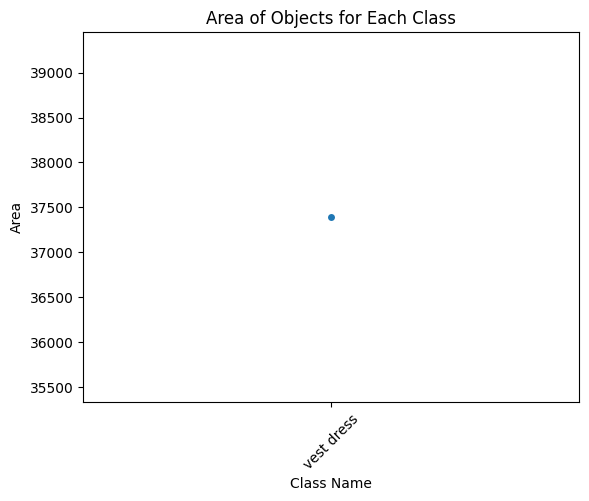

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.measure import regionprops

new_result = new_results[0]   # Extracting boundary boxes and segmentation mask
# Extracting bounding polygon
new_result.masks.xyn
# Extracting segmentation mask
extracted_masks = new_result.masks.data
masks_array = extracted_masks.cpu().numpy()
# Extract class names
class_names = new_result.names.values()
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

props_list = []

for class_name, masks in masks_by_class.items():
    for mask in masks:
        mask = mask.astype(int)

        props = regionprops(mask)

        for prop in props:
            area = prop.area
            perimeter = prop.perimeter

            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

props_df = pd.DataFrame(props_list)

props_df.to_csv('/content/Insynk-1/Results/YOLOv8_object_properties.csv', index=False)

sns.swarmplot(x='Class Name', y='Area', data=props_df)

plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

plt.xticks(rotation=45)

plt.show()
